CBC data labeled with the diagnosis of Anemia type, The data collected among several CBCs data and diagnosed manually

*Data Dictionary:*
- HGB: The amount of hemoglobin in the blood, crucial for oxygen transport.
- PlT: The number of platelets in the blood, involved in blood clotting.
- WBC: The count of white blood cells, vital for immune response.
- RBC: The count of red blood cells, responsible for oxygen transport.
- MCV (Mean Corpuscular Volume): Average volume of a single red blood cell.
- MCH (Mean Corpuscular Hemoglobin): Average amount of hemoglobin per red blood cell.
- MCHC (Mean Corpuscular Hemoglobin Concentration): Average concentration of hemoglobin in red blood cells.
- PDW: a measurement of the variability in platelet size distribution in the blood
- PCT: A procalcitonin test can help your health care provider diagnose if you have sepsis from a bacterial infection or if you have a high risk of developing sepsis
- Diagnosis: Anemia type based on the CBC parameters

### Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt 
import plotly.express as px

### Load Data 

In [2]:
df = pd.read_csv("diagnosed_cbc_data_v4.csv")

In [3]:
df.head(5)

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


#### Check null Values

In [4]:
df.isnull().value_counts()

WBC    LYMp   NEUTp  LYMn   NEUTn  RBC    HGB    HCT    MCV    MCH    MCHC   PLT    PDW    PCT    Diagnosis
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False        1281
Name: count, dtype: int64

In [5]:
df.describe()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,7.862717,25.845000,77.511000,1.880760,5.140940,4.708267,12.184551,46.1526,85.793919,32.084840,31.739149,229.981421,14.312512,0.260280
std,3.564466,7.038728,147.746273,1.335689,2.872294,2.817200,3.812897,104.8861,27.177663,111.170756,3.300352,93.019336,3.005079,0.685351
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.0000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000
25%,6.000000,25.845000,71.100000,1.880760,5.100000,4.190000,10.800000,39.2000,81.200000,25.500000,30.600000,157.000000,13.300000,0.170000
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.300000,46.1526,86.600000,27.800000,32.000000,213.000000,14.312512,0.260280
75%,8.680000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.1526,90.200000,29.600000,32.900000,293.000000,14.700000,0.260280
max,45.700000,91.400000,5317.000000,41.800000,79.000000,90.800000,87.100000,3715.0000,990.000000,3117.000000,92.800000,660.000000,97.000000,13.600000


Diagnosis:
- Healthy                           
- Normocytic hypochromic anemia     
- Normocytic normochromic anemia    
- Iron deficiency anemia            
- Thrombocytopenia                   
- Other microcytic anemia            
- Leukemia                           
- Macrocytic anemia                  
- Leukemia with thrombocytopenia     

> Label Diagnosis

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["Diagnosis"]=lb.fit_transform(df["Diagnosis"])

In [17]:
df["Diagnosis"].value_counts()

Diagnosis
0    336
5    279
6    269
1    189
8     73
7     59
2     47
4     18
3     11
Name: count, dtype: int64

<Axes: xlabel='Diagnosis', ylabel='WBC'>

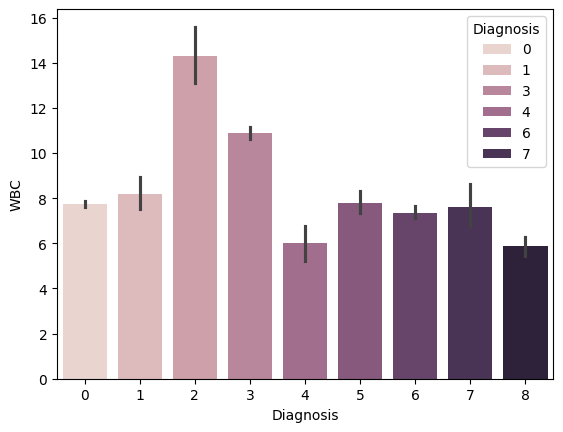

In [22]:
# sns.jointplot(df,x="WBC",y="Diagnosis")
sns.barplot(df,x="Diagnosis",y="WBC" , hue=df["Diagnosis"])

<Axes: xlabel='Diagnosis', ylabel='LYMp'>

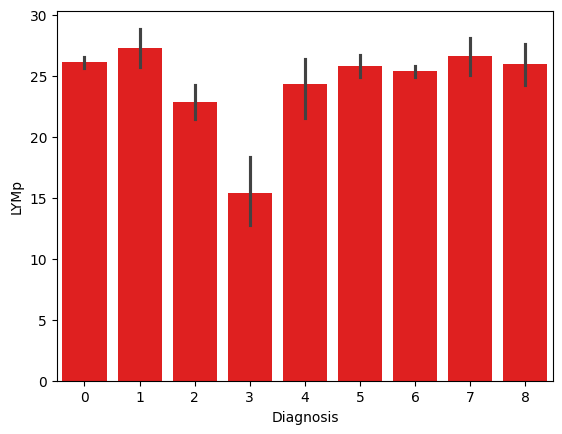

In [29]:

sns.barplot(df,x="Diagnosis",y="LYMp" ,color="r" )

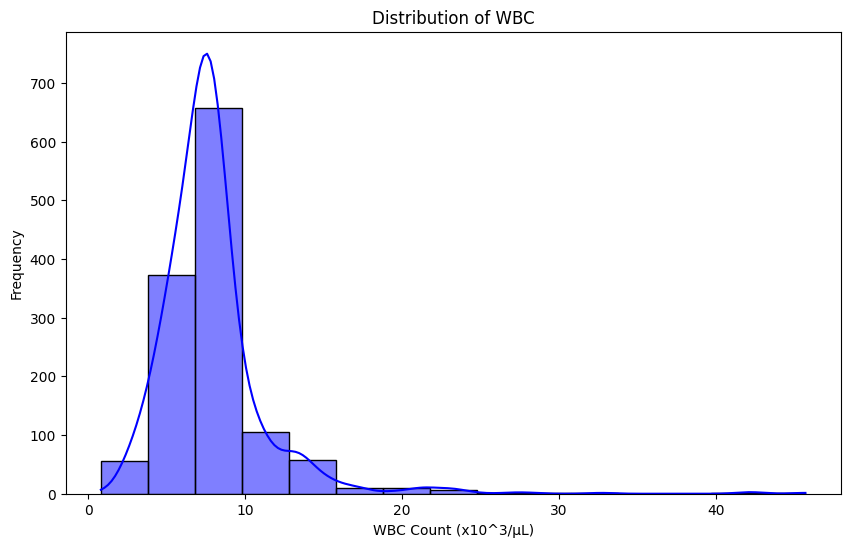

In [39]:

# 1. Distribution of features
plt.figure(figsize=(10, 6))
sns.histplot(df["WBC"], kde=True, bins=15, color='blue')
plt.title("Distribution of WBC")
plt.xlabel("WBC Count (x10^3/µL)")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'correlation heatmap')

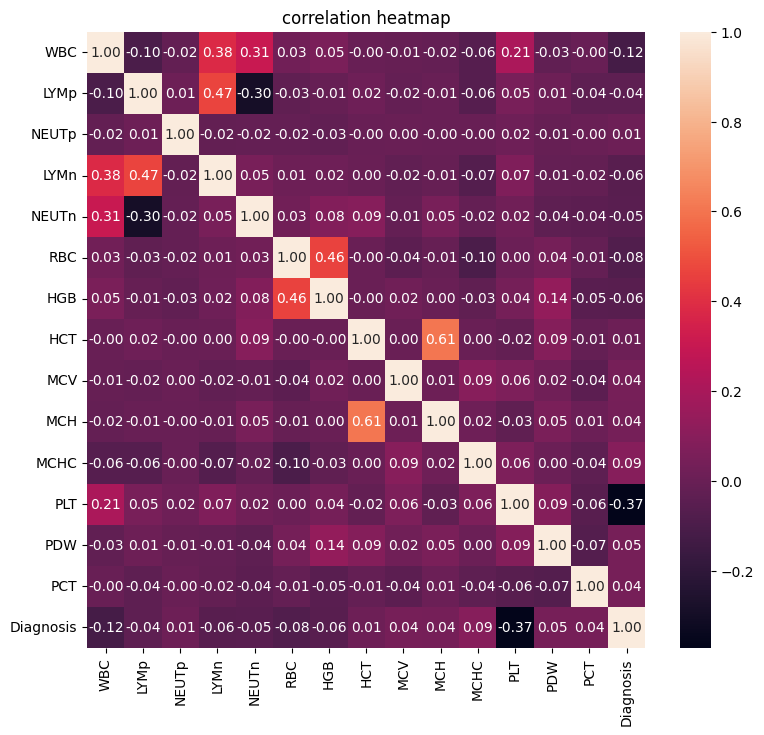

In [62]:
plt.figure(figsize=(9,8))
corr= df.corr()
sns.heatmap(corr,annot=True,fmt="0.2f")
plt.title("correlation heatmap")

<Axes: xlabel='Diagnosis'>

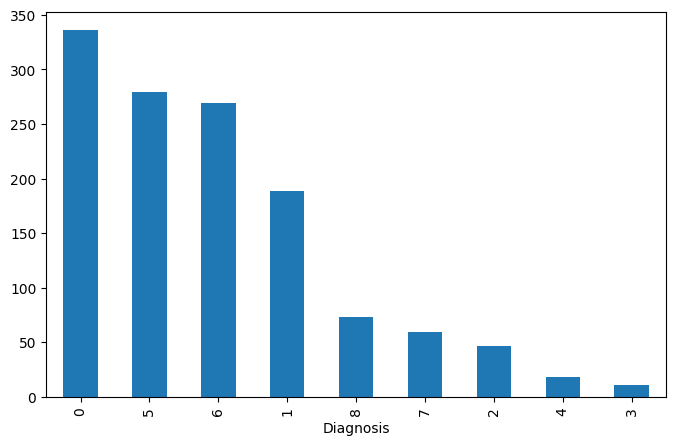

In [53]:
plt.figure(figsize=(8,5))
diagnosis_counts=df["Diagnosis"].value_counts()
diagnosis_counts.plot(kind="bar")

<Axes: ylabel='count'>

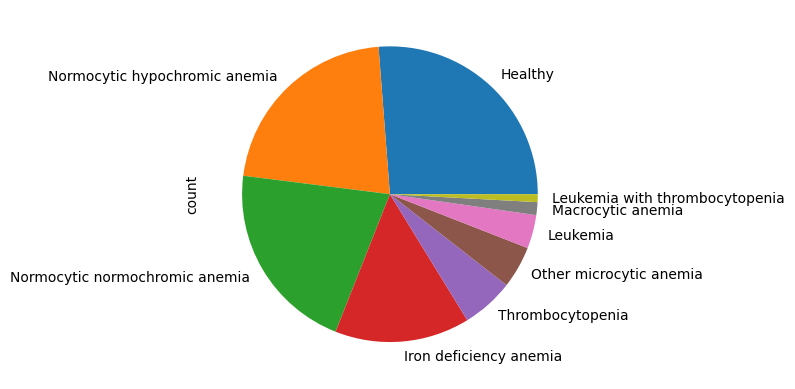

In [56]:
labels={"Healthy":0,                           
        "Normocytic hypochromic anemia":5,     
        "Normocytic normochromic anemia":6,    
        "Iron deficiency anemia":1,   
        "Thrombocytopenia":8,                   
        "Other microcytic anemia":7 ,           
        "Leukemia":2 ,                          
        "Macrocytic anemia":4,                 
        "Leukemia with thrombocytopenia":3     }
diagnosis_counts.plot(kind="pie",labels=labels)

C:\Users\al\AppData\Local\Temp\ipykernel_10948\99536414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Diagnosis", y="MCV", palette="Set3")


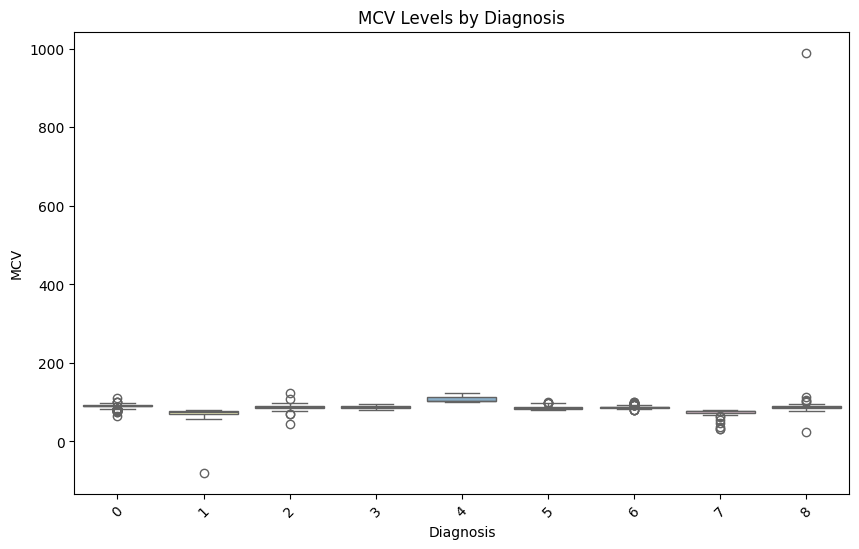

In [42]:
# 4. Boxplot for group comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Diagnosis", y="MCV", palette="Set3")
plt.title("MCV Levels by Diagnosis")
plt.xticks(rotation=45)
plt.show()

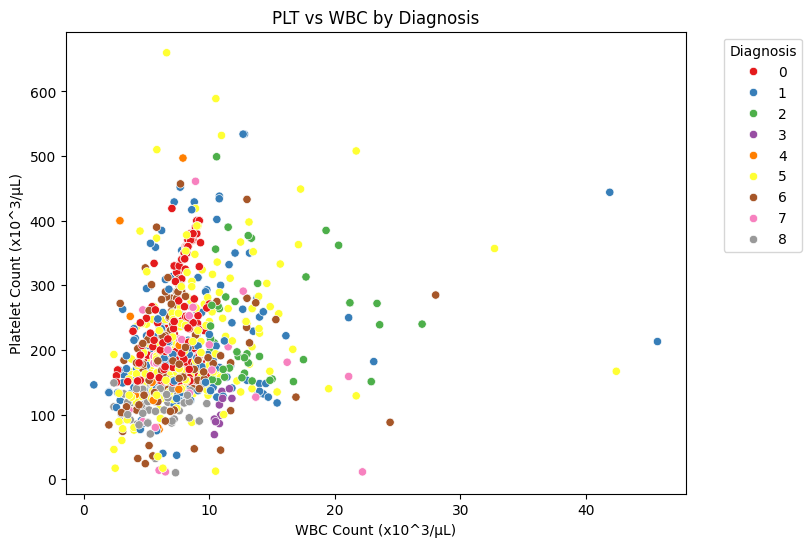

In [43]:

# 5. Scatterplot (PLT vs WBC)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="WBC", y="PLT", hue="Diagnosis", palette="Set1")
plt.title("PLT vs WBC by Diagnosis")
plt.xlabel("WBC Count (x10^3/µL)")
plt.ylabel("Platelet Count (x10^3/µL)")
plt.legend(title="Diagnosis", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

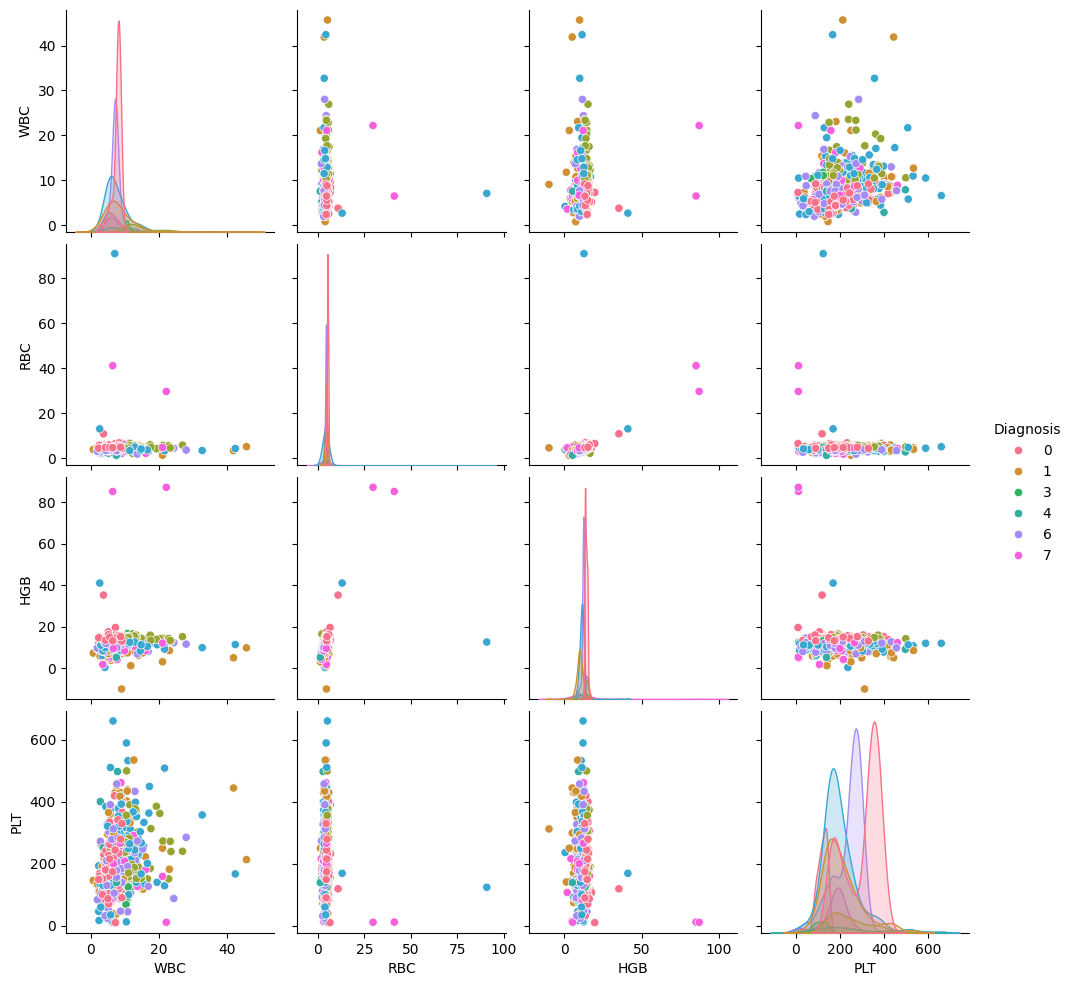

In [ ]:
sns.pairplot(df, vars=["WBC", "RBC", "HGB", "PLT"], hue="Diagnosis", palette="husl", diag_kind="kde")
plt.show()


## Model Training

split data 

In [79]:
X = df.drop("Diagnosis",axis=1)
y = df["Diagnosis"]

In [81]:
from sklearn.model_selection import train_test_split

X_train ,X_test, y_train, y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [91]:
# Random Forest Model
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [92]:
y_rf_pred = rf_model.predict(X_test)

Random Forest Accuracy with 99%

In [94]:
print(classification_report(y_test,y_rf_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       0.98      1.00      0.99        46
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      0.98      0.99        60
           6       1.00      1.00      1.00        60
           7       1.00      0.88      0.93         8
           8       1.00      0.93      0.97        15

    accuracy                           0.99       257
   macro avg       0.99      0.98      0.98       257
weighted avg       0.99      0.99      0.99       257



In [95]:
# Decision Tree model 

ds_model = DecisionTreeClassifier()

ds_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [96]:
y_ds_pred = rf_model.predict(X_test)


In [97]:
print(classification_report(y_test,y_ds_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       0.98      1.00      0.99        46
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      0.98      0.99        60
           6       1.00      1.00      1.00        60
           7       1.00      0.88      0.93         8
           8       1.00      0.93      0.97        15

    accuracy                           0.99       257
   macro avg       0.99      0.98      0.98       257
weighted avg       0.99      0.99      0.99       257



In [127]:
# MLP classifier 
from sklearn.neural_network import MLPClassifier
mlp =MLPClassifier(hidden_layer_sizes=(3,),max_iter=30000 )


In [128]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(3,), max_iter=30000)

In [129]:
y_mlp_pred=mlp.predict(X_test)

In [130]:
accuracy_score(y_test,y_mlp_pred)

0.2140077821011673

In [1]:

data = [
    {"type": "Healthy", "symptoms": ["No symptoms or occasional fatigue"]},
    {"type": "Normocytic anemia", "symptoms": ["Fatigue", "Paleness", "Shortness of breath", "Dizziness"]},
    {"type": "Microcytic anemia", "symptoms": ["Fatigue", "Weakness", "Shortness of breath", "Pale skin"]},
    {"type": "Macrocytic anemia", "symptoms": ["Fatigue", "Muscle weakness", "Pale or yellowish skin", "Shortness of breath"]},
    {"type": "Thrombocytopenia", "symptoms": ["Easy bruising", "Bleeding gums", "Nosebleeds", "Prolonged bleeding"]},
    {"type": "Leukemia", "symptoms": ["Frequent infections", "Fatigue", "Weight loss", "Easy bruising", "Swollen lymph nodes"]},
    {"type": "Iron deficiency anemia", "symptoms": ["Extreme fatigue", "Weakness", "Cold hands and feet", "Brittle nails", "Cravings for non-nutritive substances like ice or dirt"]},
    {"type": "Other microcytic anemia", "symptoms": ["Fatigue", "Weakness", "Pale skin", "Shortness of breath"]},
    {"type": "Normocytic hypochromic anemia", "symptoms": ["Mild fatigue", "Pale skin", "Dizziness"]},
    {"type": "Normocytic normochromic anemia", "symptoms": ["Mild fatigue", "Weakness", "Shortness of breath"]},
    {"type": "Leukemia with thrombocytopenia", "symptoms": ["Fatigue", "Easy bruising", "Prolonged bleeding", "Frequent infections"]},
]

goal_symptoms = ["Fatigue", "Paleness", "Shortness of breath", "Dizziness"]

# Find the number of matching symptoms
def match_count(disease_symptoms, goal_symptoms):
    return sum(1 for symptom in disease_symptoms if symptom.lower() in map(str.lower, goal_symptoms))

# Simple BFS search for matching diseases
def bfs_search(data, goal_symptoms):
    queue = data[:]  # Copy the data to the queue
    visited = set()  # Set to keep track of processed diseases

    while queue:
        current_disease = queue.pop(0)
        
        # Check for exact match
        if set(map(str.lower, current_disease['symptoms'])) == set(map(str.lower, goal_symptoms)):
            return current_disease
        
        # Add disease to visited set to prevent re-processing
        visited.add(current_disease['type'].lower())
        
        # Check partial matches and add them to the queue if they haven't been processed yet
        for neighbor in data:
            if neighbor['type'].lower() not in visited and match_count(neighbor['symptoms'], goal_symptoms) > 0:
                queue.append(neighbor)
                visited.add(neighbor['type'].lower())

    return None  # If no match is found

# Show partial matches for the given symptoms
def find_partial_matches(data, goal_symptoms):
    return [
        f"{disease['type']} (Matching symptoms: {', '.join(set(map(str.lower, disease['symptoms'])).intersection(map(str.lower, goal_symptoms)))})"
        for disease in data if match_count(disease['symptoms'], goal_symptoms) > 0
    ]

# Search for anemia based on symptoms
def search_anemia(data, goal_symptoms):
    result = bfs_search(data, goal_symptoms)
    
    if result:
        print(f"Anemia found: {result['type']}")
    else:
        print("No exact match found.")
        partial_matches = find_partial_matches(data, goal_symptoms)
        if partial_matches:
            print("Partial matches for the symptoms provided:")
            for match in partial_matches:
                print(match)
        else:
            print("No diseases match the provided symptoms.")

# Apply the search
search_anemia(data, goal_symptoms)


Anemia found: Normocytic anemia
